<a href="https://colab.research.google.com/github/Kiplimo288/BigData/blob/main/TGS2600_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model comes up with Methane concentrations for the TGS 2600 based on Aeris data and Temp and HUmidity.

In [26]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib

# Step 2: Load Data
# Assuming your dataset is named 'sensor_data.csv'
data = pd.read_csv('ML_DATA.csv')

# Step 3: Data Preprocessing
# Extract features and target variable
X = data[['TGS2600', 'DHT22_Temperature', 'DHT22_Humidity']]  # Features
y = data['CH4 (ppm)']  # Target variable

# Step 4: Randomly Split Data into Training and Testing Sets
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Save Models to Disk
# Save Linear Regression model to disk
joblib.dump(linear_model, 'linear_regression_model.pkl')

# Save Random Forest Regressor model to disk
joblib.dump(rf_model, 'random_forest_regressor_model.pkl')


['random_forest_regressor_model.pkl']

In [1]:
# Step 1: Import Libraries
import pandas as pd
import joblib

# Step 2: Load the Trained Models
# Load Linear Regression model
linear_model = joblib.load('linear_regression_model.pkl')

# Load Random Forest Regressor model
rf_model = joblib.load('random_forest_regressor_model.pkl')

# Step 3: Load the New Dataset
# Assuming your new dataset is named 'TGS2600_Trained.csv'
new_data = pd.read_csv('TGS2600_Trained.csv')

# Step 4: Predict CH4 Values using Trained Models
# Extract features
X_new = new_data[['TGS2600', 'DHT22_Temperature', 'DHT22_Humidity']]

# Predict CH4 values using Linear Regression
new_data['TGS2600CH4_Regression'] = linear_model.predict(X_new)

# Predict CH4 values using Random Forest Regressor
new_data['TGS2600CH4_RandomForest'] = rf_model.predict(X_new)

# Step 5: Save the Updated DataFrame with Predicted Values
# Assuming you want to save the updated DataFrame to a new CSV file
new_data.to_csv('TGS2600_Trained_Predicted.csv', index=False)


In [2]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 2: Load the Updated DataFrame with Predicted Values
predicted_data = pd.read_csv('TGS2600_Trained_Predicted.csv')

# Step 3: Extract Actual and Predicted CH4 Values
actual_ch4 = predicted_data['CH4 (ppm)']
predicted_ch4_linear = predicted_data['TGS2600CH4_Regression']
predicted_ch4_rf = predicted_data['TGS2600CH4_RandomForest']

# Step 4: Calculate Metrics for Linear Regression Model
r2_linear = r2_score(actual_ch4, predicted_ch4_linear)
mae_linear = mean_absolute_error(actual_ch4, predicted_ch4_linear)
mse_linear = mean_squared_error(actual_ch4, predicted_ch4_linear)

# Step 5: Calculate Metrics for Random Forest Model
r2_rf = r2_score(actual_ch4, predicted_ch4_rf)
mae_rf = mean_absolute_error(actual_ch4, predicted_ch4_rf)
mse_rf = mean_squared_error(actual_ch4, predicted_ch4_rf)

# Step 6: Print the Results
print("Linear Regression Model:")
print("R-squared:", r2_linear)
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print()
print("Random Forest Model:")
print("R-squared:", r2_rf)
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)


Linear Regression Model:
R-squared: 0.0050605584134363335
Mean Absolute Error: 0.5945666394737427
Mean Squared Error: 3.0391644761249648

Random Forest Model:
R-squared: 0.7467113680990123
Mean Absolute Error: 0.16140579333715996
Mean Squared Error: 0.7737011722565227


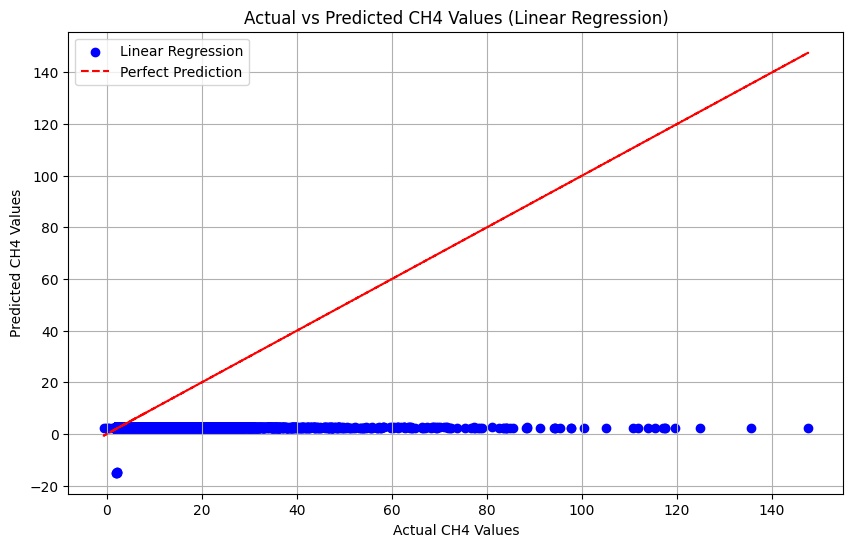

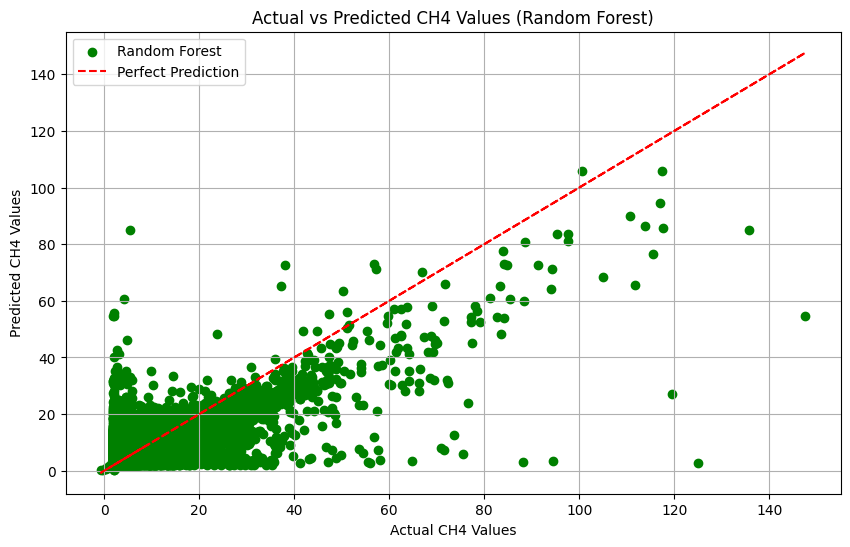

In [3]:
# Step 1: Import Libraries
import matplotlib.pyplot as plt

# Step 2: Plot Actual vs Predicted CH4 Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(actual_ch4, predicted_ch4_linear, color='blue', label='Linear Regression')
plt.plot(actual_ch4, actual_ch4, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted CH4 Values (Linear Regression)')
plt.xlabel('Actual CH4 Values')
plt.ylabel('Predicted CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot Actual vs Predicted CH4 Values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(actual_ch4, predicted_ch4_rf, color='green', label='Random Forest')
plt.plot(actual_ch4, actual_ch4, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted CH4 Values (Random Forest)')
plt.xlabel('Actual CH4 Values')
plt.ylabel('Predicted CH4 Values')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

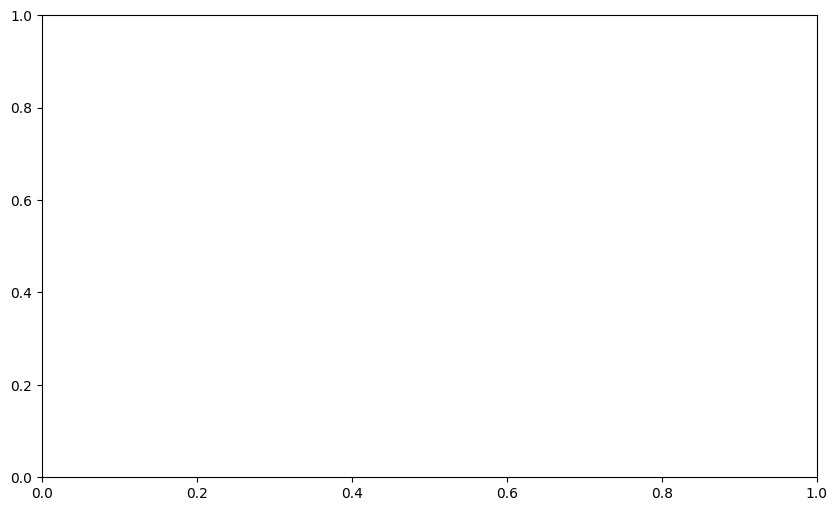

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read the Updated DataFrame with Predicted Values
predicted_data = pd.read_csv('TGS2600_Trained_Predicted.csv')

# Step 3: Extract Actual and Predicted CH4 Values
actual_ch4 = predicted_data['CH4 (ppm)']
predicted_ch4_linear = predicted_data['TGS2600CH4_Regression']
predicted_ch4_rf = predicted_data['TGS2600CH4_RandomForest']

# Step 4: Scatter Plot of Target Variable vs Predicted Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.scatter(predicted_data['Timestamp'], predicted_ch4_linear, color='red', label='Linear Regression Predictions')
plt.title('Actual CH4 Values vs Linear Regression Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Scatter Plot of Target Variable vs Predicted Values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.scatter(predicted_data['Timestamp'], predicted_ch4_rf, color='green', label='Random Forest Predictions')
plt.title('Actual CH4 Values vs Random Forest Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Time Series Plot of Target Variable vs Predicted Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.plot(predicted_data['Timestamp'], predicted_ch4_linear, color='red', label='Linear Regression Predictions')
plt.title('Time Series Plot of Actual CH4 Values vs Linear Regression Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Time Series Plot of Target Variable vs Predicted Values for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.plot(predicted_data['Timestamp'], predicted_ch4_rf, color='green', label='Random Forest Predictions')
plt.title('Time Series Plot of Actual CH4 Values vs Random Forest Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()


Equations

In [2]:
####Equation for linear regression
# Get the intercept and coefficients of the Linear Regression model
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Print the Linear Regression equation
print(f"Linear Regression Equation: CH4 (ppm) = {intercept} + {coefficients[0]} * TGS2600 + {coefficients[1]} * DHT22_Temperature + {coefficients[2]} * DHT22_Humidity")


NameError: name 'linear_model' is not defined

In [ ]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")
